In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob

from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv("/content/drive/MyDrive/internship/stock_sentiment.csv")

In [49]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [50]:
df.shape

(5791, 2)

In [51]:
df.iloc[0]

Text         Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
Sentiment                                                    1
Name: 0, dtype: object

In [52]:
df.Sentiment.unique()

array([1, 0])

In [53]:
df.isna().sum()

Text         0
Sentiment    0
dtype: int64

####No null values are present

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


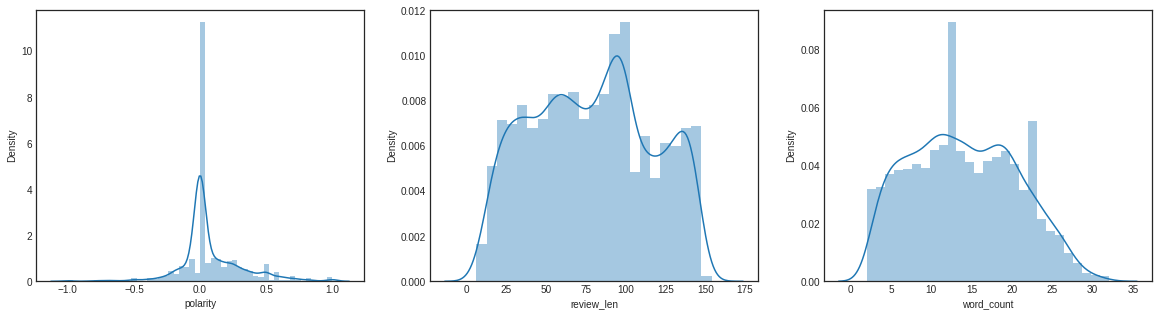

In [55]:
#Extracting the features from the news
messages=df.copy()
messages['polarity'] = messages['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
messages['review_len'] = messages['Text'].astype(str).apply(len)
messages['word_count'] = messages['Text'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(messages['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(messages['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(messages['word_count'])
fig = plt.gcf()

So taking some insight from the data using TextBlob library :
* we find that the polarity of the statements is neutral.
* we also see that the lenth of text is ranging from 0 to 175 some what following a normal distribution
* also the word count is between 0 to 35 with 12 as an maximum .

In [56]:
df['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

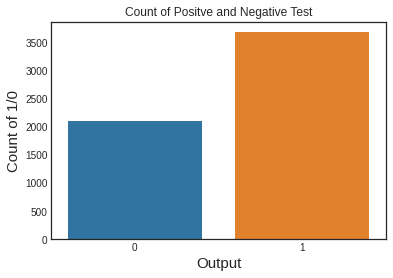

In [57]:
ax=sns.countplot(x="Sentiment", data=df)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of 1/0',title='Count of Positve and Negative Test')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

####so we can see the data is Quite imbalance

* we have more data belongs to Sentiment 1 in comparision to Sentiment O.

In [58]:
Text_label1=df['Text'][df['Sentiment']==1]
Text_label0=df['Text'][df['Sentiment']==0]

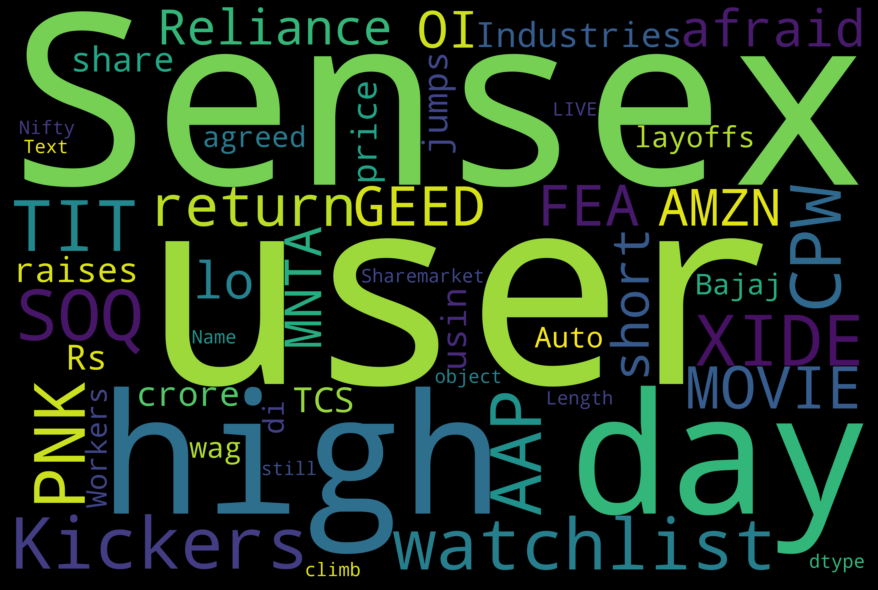

In [59]:
text = Text_label1
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###Common words with text having sentiments such as SENSEX,USER etc

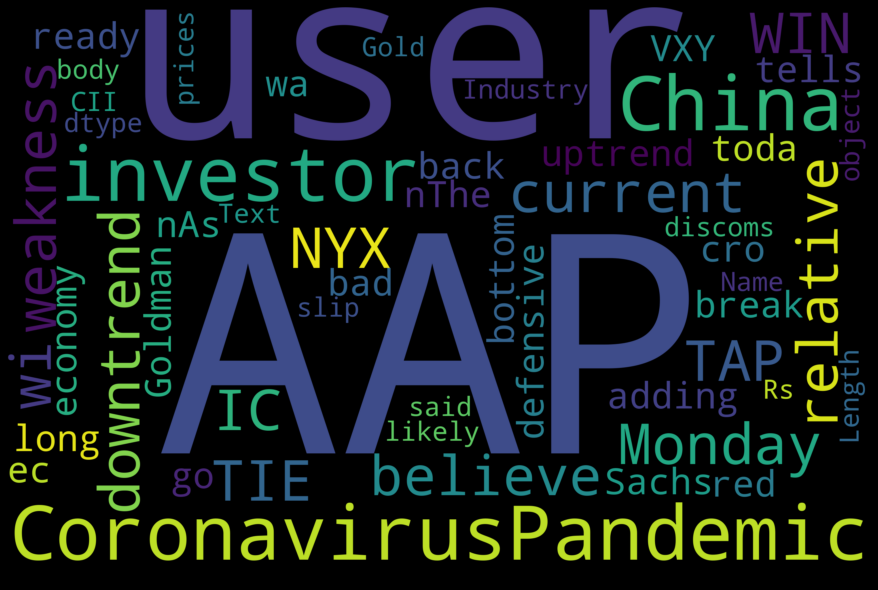

In [60]:
text = Text_label0
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###So you can see that the text which are having label zero are having frequent words such as CoronavirusPandemic,AAP n all.

#Cleaning The Text

In [61]:

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [62]:
#converting EMOTICONS to word as they can we very important in sentiment anylasis
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

df["text"] = df["Text"].apply(lambda text: convert_emoticons(text))
df.head()

,Text,Sentiment,text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: AAP MOVIE. 55% return for the FEA/GEED i...
2,user I'd be afraid to short AMZN - they are lo...,1,user I'd be afraid to short AMZN - they are lo...
3,MNTA Over 12.00,1,MNTA Over 12.00
4,OI Over 21.37,1,OI Over 21.37


In [63]:
df.iloc[539]

Text           HPQ is 17.50 too much to ask for tomorrow??? :)
Sentiment                                                    1
text         HPQ is 17.50 too much to ask for tomorrow??? H...
Name: 539, dtype: object

###So you can see that " :) " get converted into Happy face

In [64]:
#Removing Puntuactions
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["Text"].apply(lambda text: remove_punctuation(text))
df.head()

,Text,Sentiment,text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


##Converting the Chat Word 

In [65]:

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [66]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_words_conversion("one minute brb")

'one minute Be Right Back'

In [67]:
df["text"] = df["text"].apply(lambda text: chat_words_conversion(text))
df.iloc[510]

Text                AAP watch CS, it's a tell for AAP imo!
Sentiment                                                1
text         AAP watch CS its a tell for AAP In My Opinion
Name: 510, dtype: object

####So you can see "imo" get changes to In MY Opinion

In [68]:
#frequent words
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 1797),
 ('to', 1671),
 ('a', 1280),
 ('on', 1044),
 ('of', 946),
 ('AAP', 920),
 ('in', 912),
 ('for', 876),
 ('and', 855),
 ('is', 820)]

###Since the count of words of our dataset is NOT large so we are not going to remove the most frequent words

#Handiling Imbalanced data

In [69]:
#do the startify thing while spliting the dataset
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1, stratify = data['outputCol'])

#Tokenizing the Sentence

###Removing Numbers-->Lowering  the text --> steming -->Storing them in corpus

In [70]:
ps = PorterStemmer()
messages=df.copy()
corpus=[]
for i in range(0,(len(messages))):
  words=re.sub('[^a-zA-Z]',' ',messages['text'][i])
  words=re.sub('\W',' ', words)
  words=words.lower()
  words=words.split()
  words=[ps.stem(word) for word in words]
  words=' '.join(words)
  corpus.append(words)

In [71]:
corpus

['kicker on my watchlist xide tit soq pnk cpw bpz aj trade method or method see prev post',
 'user aap movi return for the feage indic just trade for the year awesom',
 'user id be afraid to short amzn they are look like a nearmonopoli in ebook and infrastructureasaservic',
 'mnta over',
 'oi over',
 'pgnx over',
 'aap user if so then the current downtrend will break otherwis just a shortterm correct in medterm downtrend',
 'monday rel weak nyx win tie tap ice int bmc aon c chk biib',
 'goog ower trend line channel test volum support',
 'aap will watch tomorrow for ong entri',
 'im assum fcx open tomorrow abov the trigger buy still veri much like thi setup',
 'it realli worri me how everyon expect the market to ralli nowusu exact opposit happen everi time we shall see soon bac spx jpm',
 'aap gamco arri haverti appl is extrem cheap great video',
 'user maykiljil post that i agre that msft is go higher possibl north of',
 'momentum is come back to etfc broke ma resist on solid volum fri

#Model building BOW model

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_bow = cv.fit_transform(corpus).toarray()

In [73]:
y=messages['Sentiment']

In [74]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, stratify = messages['Sentiment'] ,random_state=42)

In [75]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix,f1_score

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Multinomial Navie Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier=MultinomialNB()

f1_score : 0.8359580052493438
recall score : 0.8631436314363143
precision score : 0.8104325699745547
accuracy score : 0.7842968075927523
Confusion matrix, without normalization


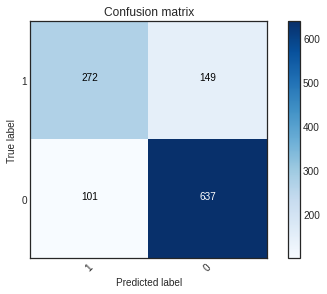

In [78]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print('f1_score :',f1_score(y_test,pred))
print('recall score :',recall_score(y_test,pred))
print('precision score :',precision_score(y_test,pred))
print('accuracy score :',accuracy_score(y_test,pred))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

#Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# make train and test bo

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(X_bow,y, test_size = (0.2), stratify = messages['Sentiment'],random_state=42)
# initialize Logistic Regression
lr = LogisticRegression()
# fit the model
lr.fit(xtrain_bow, ytrain)
# predicting on the validation set
prediction = lr.predict_proba(xvalid_bow)
# if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction[:,1] >= 0.5
# convert to int values
prediction_int = prediction_int.astype(np.int)
# calculating f1 score
#f1_score(yvalid, prediction_int)

In [81]:
print('f1_score :',f1_score(yvalid,prediction_int))
print('recall score :',recall_score(yvalid,prediction_int))
print('precision score :',precision_score(yvalid,prediction_int))
print('accuracy score :',accuracy_score(yvalid,prediction_int))

f1_score : 0.8389217619986851
recall score : 0.8644986449864499
precision score : 0.8148148148148148
accuracy score : 0.7886108714408974


Confusion matrix, without normalization


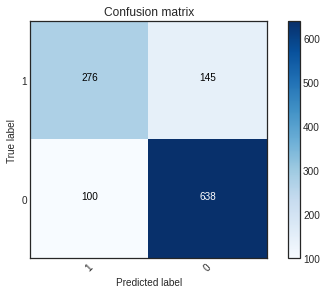

In [82]:

cm = metrics.confusion_matrix(yvalid, prediction_int)
plot_confusion_matrix(cm, classes=['1', '0'])

#Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = RandomForestClassifier()
#using bow features## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

f1_score : 0.8466966003848622
recall score : 0.9016393442622951
precision score : 0.7980652962515115
accuracy score : 0.7937877480586712
Confusion matrix, without normalization


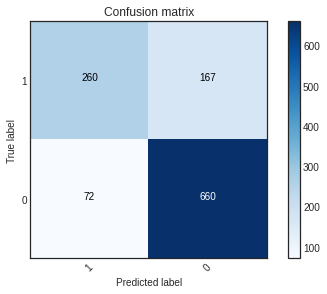

In [84]:
print('f1_score :',f1_score(y_test,y_pred))
print('recall score :',recall_score(y_test,y_pred))
print('precision score :',precision_score(y_test,y_pred))
print('accuracy score :',accuracy_score(y_test,y_pred))


cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['1', '0'])

#TF-IDF FEATURES

In [85]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

In [86]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y, test_size=0.2, random_state=42)

#MultiNomial Naive bayes

In [87]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

f1_score : 0.8191796649335644
recall score : 0.9685792349726776
precision score : 0.7097097097097097
accuracy score : 0.7299396031061259
Confusion matrix, without normalization


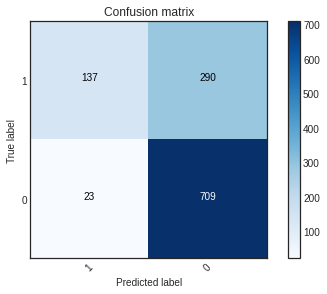

In [88]:
print('f1_score :',f1_score(y_test,pred))
print('recall score :',recall_score(y_test,pred))
print('precision score :',precision_score(y_test,pred))
print('accuracy score :',accuracy_score(y_test,pred))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

#Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# make train and test bo

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(X_tfidf,y, test_size = (0.2))
# initialize Logistic Regression
lr = LogisticRegression()
# fit the model
lr.fit(xtrain_tfidf, ytrain)
# predicting on the validation set
prediction = lr.predict_proba(xvalid_tfidf)
# if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction[:,1] >= 0.5
# convert to int values
prediction_int = prediction_int.astype(np.int)
# calculating f1 score
#f1_score(yvalid, prediction_int)

In [90]:
print('f1_score :',f1_score(yvalid,prediction_int))
print('recall score :',recall_score(yvalid,prediction_int))
print('precision score :',precision_score(yvalid,prediction_int))
print('accuracy score :',accuracy_score(yvalid,prediction_int))

f1_score : 0.8367844092570036
recall score : 0.9308943089430894
precision score : 0.7599557522123894
accuracy score : 0.7687661777394306


Confusion matrix, without normalization


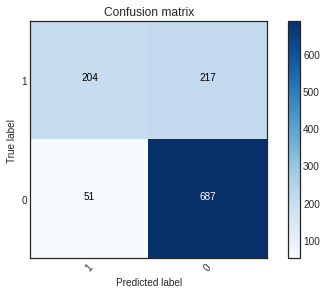

In [91]:
cm = metrics.confusion_matrix(yvalid, prediction_int)
plot_confusion_matrix(cm, classes=['1', '0'])

#Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = RandomForestClassifier()
#using bow features## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

In [93]:
print('f1_score :',f1_score(y_test,y_pred))
print('recall score :',recall_score(y_test,y_pred))
print('precision score :',precision_score(y_test,y_pred))
print('accuracy score :',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

f1_score : 0.8505025125628141
recall score : 0.924863387978142
precision score : 0.7872093023255814
accuracy score : 0.7946505608283002
[[244 183]
 [ 55 677]]


Confusion matrix, without normalization


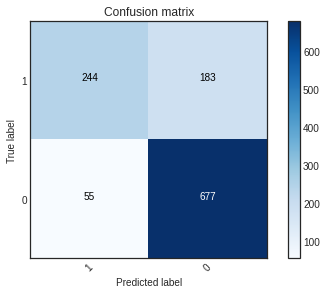

In [94]:

cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['1', '0'])

#COMPARISION OF MODELS

In [95]:
comparision1={'Model(with BoW)':['M.Naive Bayes','Logistic Regression','Random Forest'],
            'Accuracy':[ 0.7842968075927523,0.7886108714408974,0.7937877480586712]};

In [96]:
df=pd.DataFrame(comparision1)
df

,Model(with BoW),Accuracy
0,M.Naive Bayes,0.784297
1,Logistic Regression,0.788611
2,Random Forest,0.793788


In [99]:
comparision2={'Model(with tf-idf)':['M.Naive Bayes','Logistic Regression','Random Forest'],
            'Accuracy':[0.7299396031061259,0.7687661777394306,0.7946505608283002]};

In [100]:
df=pd.DataFrame(comparision2)
df

,Model(with tf-idf),Accuracy
0,M.Naive Bayes,0.729940
1,Logistic Regression,0.768766
2,Random Forest,0.794651
